In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import pickle
from collections import Counter

In [175]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [176]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [253]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [251]:
min(df['bmi'])

10.3

In [258]:
max(df['bmi'])

97.6

In [177]:
df.drop("id",axis=1,inplace=True)

In [178]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [179]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [180]:
df.shape

(5110, 11)

In [181]:
df.isnull().sum() / df.shape[0]

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [182]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [183]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [184]:
cols_to_encode = ["gender",'ever_married','work_type','Residence_type','smoking_status']

In [185]:
ohe = OneHotEncoder(handle_unknown="ignore")

In [186]:
ohe.fit(df[cols_to_encode])

OneHotEncoder(handle_unknown='ignore')

In [187]:
enc_df = pd.DataFrame(ohe.fit_transform(df[cols_to_encode]).toarray())

In [188]:
enc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [189]:
final_df = df.drop(cols_to_encode,axis=1)

In [190]:
final_df = pd.concat([final_df,enc_df],axis=1)

In [191]:
final_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,28.1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,81.0,0,0,125.20,40.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,35.0,0,0,82.99,30.6,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,51.0,0,0,166.29,25.6,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [254]:
with open("OneHotEncoder.pkl",'wb') as file:
    pickle.dump(ohe,file)

In [193]:
pd.set_option("display.max_columns",100)
final_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,28.1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


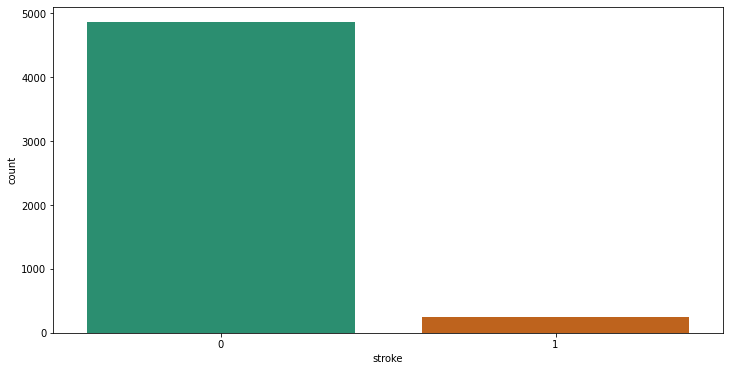

In [194]:
plt.figure(figsize=(12,6))
sns.countplot(df['stroke'],palette='Dark2')
plt.show()

In [195]:
X = final_df.drop("stroke",axis=1)
y = final_df['stroke']

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [197]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [198]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
preds = model.predict(X_test_scaled)

print("*"*30)
print(accuracy_score(y_test,preds))
print("*"*30)
print(confusion_matrix(y_test,preds))
print("*"*30)
print(classification_report(y_test,preds))
print("*"*30)

******************************
0.9460093896713615
******************************
[[1208    0]
 [  69    1]]
******************************
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       1.00      0.01      0.03        70

    accuracy                           0.95      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.95      0.95      0.92      1278

******************************


In [199]:
model = KNeighborsClassifier()
model.fit(X_train_scaled,y_train)
preds = model.predict(X_test_scaled)

print("*"*30)
print(accuracy_score(y_test,preds))
print("*"*30)
print(confusion_matrix(y_test,preds))
print("*"*30)
print(classification_report(y_test,preds))
print("*"*30)

******************************
0.9436619718309859
******************************
[[1204    4]
 [  68    2]]
******************************
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.33      0.03      0.05        70

    accuracy                           0.94      1278
   macro avg       0.64      0.51      0.51      1278
weighted avg       0.91      0.94      0.92      1278

******************************


In [200]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled,y_train)
preds = model.predict(X_test_scaled)

print("*"*30)
print(accuracy_score(y_test,preds))
print("*"*30)
print(confusion_matrix(y_test,preds))
print("*"*30)
print(classification_report(y_test,preds))
print("*"*30)

******************************
0.9107981220657277
******************************
[[1154   54]
 [  60   10]]
******************************
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1208
           1       0.16      0.14      0.15        70

    accuracy                           0.91      1278
   macro avg       0.55      0.55      0.55      1278
weighted avg       0.91      0.91      0.91      1278

******************************


In [201]:
model = RandomForestClassifier()
model.fit(X_train_scaled,y_train)
preds = model.predict(X_test_scaled)

print("*"*30)
print(accuracy_score(y_test,preds))
print("*"*30)
print(confusion_matrix(y_test,preds))
print("*"*30)
print(classification_report(y_test,preds))
print("*"*30)

******************************
0.9460093896713615
******************************
[[1208    0]
 [  69    1]]
******************************
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       1.00      0.01      0.03        70

    accuracy                           0.95      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.95      0.95      0.92      1278

******************************


In [236]:
smote = SMOTE(sampling_strategy=0.2)
rus = RandomUnderSampler(sampling_strategy=0.5)

steps = [("s",smote),("rus",rus)]

pipeline = Pipeline(steps=steps)

X_sm,y_sm = pipeline.fit_resample(X,y)

In [237]:
Counter(y)

Counter({1: 249, 0: 4861})

In [238]:
Counter(y_sm)

Counter({0: 1944, 1: 972})

In [239]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.25,random_state=101)

In [240]:
model = LogisticRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

print("*"*30)
print(accuracy_score(y_test,preds))
print("*"*30)
print(confusion_matrix(y_test,preds))
print("*"*30)
print(classification_report(y_test,preds))
print("*"*30)

******************************
0.7791495198902606
******************************
[[418  84]
 [ 77 150]]
******************************
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       502
           1       0.64      0.66      0.65       227

    accuracy                           0.78       729
   macro avg       0.74      0.75      0.74       729
weighted avg       0.78      0.78      0.78       729

******************************


In [241]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)

print("*"*30)
print(accuracy_score(y_test,preds))
print("*"*30)
print(confusion_matrix(y_test,preds))
print("*"*30)
print(classification_report(y_test,preds))
print("*"*30)

******************************
0.8573388203017832
******************************
[[442  60]
 [ 44 183]]
******************************
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       502
           1       0.75      0.81      0.78       227

    accuracy                           0.86       729
   macro avg       0.83      0.84      0.84       729
weighted avg       0.86      0.86      0.86       729

******************************


In [242]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds = knn.predict(X_test)

print("*"*30)
print(accuracy_score(y_test,preds))
print("*"*30)
print(confusion_matrix(y_test,preds))
print("*"*30)
print(classification_report(y_test,preds))
print("*"*30)

******************************
0.8257887517146777
******************************
[[395 107]
 [ 20 207]]
******************************
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       502
           1       0.66      0.91      0.77       227

    accuracy                           0.83       729
   macro avg       0.81      0.85      0.81       729
weighted avg       0.86      0.83      0.83       729

******************************


In [243]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)

print("*"*30)
print(accuracy_score(y_test,preds))
print("*"*30)
print(confusion_matrix(y_test,preds))
print("*"*30)
print(classification_report(y_test,preds))
print("*"*30)

******************************
0.8957475994513031
******************************
[[480  22]
 [ 54 173]]
******************************
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       502
           1       0.89      0.76      0.82       227

    accuracy                           0.90       729
   macro avg       0.89      0.86      0.87       729
weighted avg       0.90      0.90      0.89       729

******************************


In [244]:
svc = SVC()
svc.fit(X_train,y_train)
preds = svc.predict(X_test)

print("*"*30)
print(accuracy_score(y_test,preds))
print("*"*30)
print(confusion_matrix(y_test,preds))
print("*"*30)
print(classification_report(y_test,preds))
print("*"*30)

******************************
0.7626886145404664
******************************
[[395 107]
 [ 66 161]]
******************************
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       502
           1       0.60      0.71      0.65       227

    accuracy                           0.76       729
   macro avg       0.73      0.75      0.74       729
weighted avg       0.78      0.76      0.77       729

******************************


In [245]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
preds = xgb.predict(X_test)

print("*"*30)
print(accuracy_score(y_test,preds))
print("*"*30)
print(confusion_matrix(y_test,preds))
print("*"*30)
print(classification_report(y_test,preds))
print("*"*30)

[15:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
******************************
0.8943758573388203
******************************
[[469  33]
 [ 44 183]]
******************************
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       502
           1       0.85      0.81      0.83       227

    accuracy                           0.89       729
   macro avg       0.88      0.87      0.88       729
weighted avg       0.89      0.89      0.89       729

******************************


In [256]:
with open("model.pkl",'wb') as file:
    pickle.dump(knn,file)